# Problem 1: Aminer: basic data analysis

### reading from the file

In [23]:
#Initial set up
authors = set()
venues = set()
publication = set()
citation = set()
index = ""

In [44]:
with open(file = "./acm.v9/acm.txt",mode= "r+",newline='', encoding="utf8") as file:
    for line in file:
        if line.startswith("#index"):
            index = line[6:]
            publication.update(line)
        elif line.startswith("#@"):
            for auth in line[2:].split(";"):
                authors.update(auth.strip())
        elif line.startswith("#c"):
            venues.update(line)
        elif line.startswith("#%"):
            citation.update(index+line)

AttributeError: 'list' object has no attribute 'update'

### A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [25]:
print("Total number of Distinct Authors :-" , len(authors))
print("Total number of Venues:-" , len(venues))
print("Total number of Publications:-" , len(publication))
print("Total number of Citations/Referenes:-" , len(citation))

Total number of Distinct Authors :- 377
Total number of Venues:- 156
Total number of Publications:- 17
Total number of Citations/Referenes:- 13


### B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [31]:
venue_set = set()

with open(file = "./acm.v9/acm.txt",mode="r+",newline="",encoding="utf8") as file2:
    # index = ""
    venue = ""
    for row in file2:
        if row.startswith("#c"):
            if "Principles and Practice of Knowledge Discovery in Databases" in row:
                venue = row[2:]
                venue_set.add(venue)

print("Venue lists are ")
for venue in venue_set:
    print(venue)


Venue lists are 
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)



Observation: On the basis of above results, the count numbers aren't accurate. We can see that venues have different name for different years of publication. This inflates the count of venues.

### C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

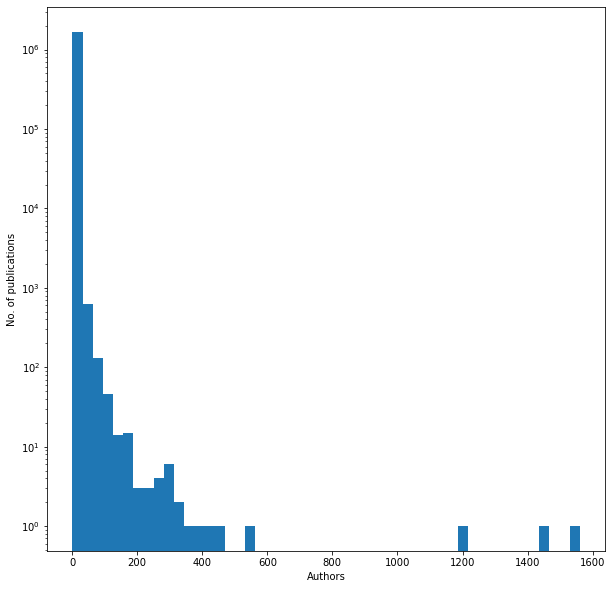

In [46]:
auth_pubs = {}
with open("./acm.v9/acm.txt","r+",newline='',encoding="utf8") as file:
    for line in file:
        if(line.startswith("#@")):
            for auth in line[2:].split(";"):
                if auth_pubs.get(auth.strip()) == None:
                    auth_pubs[auth.strip()] =1 
                else:
                    auth_pubs[auth.strip()] += 1
authors = list(auth_pubs.keys())
publications = list(auth_pubs.values())
emptyAuthors = authors.index('')

del authors[emptyAuthors]
del publications[emptyAuthors]

import math 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.xlabel('Authors')
plt.ylabel('No. of publications')
n, bins, _ = plt.hist(publications, bins =50, log = True, )
plt.show()

### D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values.

In [43]:
import numpy as np
print("Mean:",np.mean(publications))
print("Standard Deviation:",np.std(publications))
print("1st Quartile:",np.percentile(publications,25))
print("Median:",np.percentile(publications,50))
print("3rd Quartile:",np.percentile(publications,75))

Mean: 1.3374917079969635
Standard Deviation: 2.8744565757272094
1st Quartile: 1.0
Median: 1.0
3rd Quartile: 1.0


Most of the authors have 1 publication, as the mean, 1st 